In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignoring warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"Medical Appointments No-Show/medical-appointments-no-show-en.csv")

## Checking the data

In [4]:
df.shape

(49593, 26)

In [5]:
df.head()

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09/09/2021,yes,surto,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09/09/2021,no,NaN,motor,10/10/1954,5/2/2020,B. CAMBORIU,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild


# Data Cleaning

## Checking for null values

In [6]:
df.isna().sum()

specialty                   7454
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             47856
disability                  5137
date_of_birth              10321
entry_service_date          5155
city                        5181
icd                        38876
appointment_month              0
appointment_year               0
appointment_shift              0
age                        10350
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day            1016
average_rain_day            1016
max_temp_day                1016
max_rain_day                1016
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64

## Checking for duplicates

In [7]:
print('Duplicate rows:',df.duplicated().sum())

Duplicate rows: 2921


## Summary Statistics

In [8]:
print("Numerical Summary:\n")
df.describe()

Numerical Summary:



,appointment_year,age,under_12_years_old,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before
count,49593.000000,39243.000000,49593.000000,49593.000000,49593.000000,48577.000000,48577.000000,48577.000000,48577.000000,49593.000000,49593.000000
mean,2018.255076,18.522361,0.472446,0.071784,0.544230,19.748317,0.190119,23.961984,1.895687,0.981005,0.981005
std,1.736964,19.234999,0.499245,0.258133,0.498045,3.428767,0.452214,3.819804,4.445412,0.136507,0.136507
min,2016.000000,2.000000,0.000000,0.000000,0.000000,8.940000,0.000000,13.300000,0.000000,0.000000,0.000000
25%,2017.000000,8.000000,0.000000,0.000000,0.000000,17.480000,0.000000,21.400000,0.000000,1.000000,1.000000
50%,2018.000000,11.000000,0.000000,0.000000,1.000000,20.060000,0.010000,23.900000,0.200000,1.000000,1.000000
75%,2019.000000,15.000000,1.000000,0.000000,1.000000,22.120000,0.150000,26.500000,1.600000,1.000000,1.000000
max,2022.000000,110.000000,1.000000,1.000000,1.000000,28.010000,4.770000,35.400000,45.000000,1.000000,1.000000


In [9]:
print(" Categorical Summary:\n")
df.describe(include='object')

 Categorical Summary:



,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,icd,appointment_month,appointment_shift,rain_intensity,heat_intensity
count,42139,49593,49593,49593,49593,1737,44456,39272,44438,44412,10717,49593,49593,49593,49593
unique,8,74,3,1001,2,341,3,954,333,13,63,12,2,4,5
top,speech therapy,14:40,M,17/04/2017,no,doente,intellectual,21/3/2017,6/3/2017,ITAJAÍ,F84,oct,afternoon,no_rain,mild
freq,11877,4130,37583,267,44761,197,30882,215,960,20515,3475,6282,27865,35362,23413


## Standardize column names

In [10]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('-', '_')
    .str.replace(' ', '_')
)

## Remove Duplicates

In [11]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Duplicate rows: 2921


## Handle Missing Values

In [12]:
print("Missing values before cleaning:")
print(df.isna().sum())

Missing values before cleaning:
specialty                   5948
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             44975
disability                  3818
date_of_birth               8678
entry_service_date          3836
city                        3862
icd                        36455
appointment_month              0
appointment_year               0
appointment_shift              0
age                         8704
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day             707
average_rain_day             707
max_temp_day                 707
max_rain_day                 707
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64


In [13]:
df.replace(['NA', 'NaN', 'None', 'nan', ' '], np.nan, inplace=True)

## Standardize 'no_show' column

In [14]:
if 'no_show' in df.columns:
    df['no_show'] = df['no_show'].str.strip().str.lower()
    df['no_show'] = df['no_show'].replace({'no': 0, 'yes': 1})
    df['no_show'] = df['no_show'].astype('category')

## Cleaning categorical columns

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower().str.replace('-', '_')

In [16]:
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
specialty                   5948
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             44975
disability                  3827
date_of_birth               8691
entry_service_date          3836
city                        3862
icd                        36455
appointment_month              0
appointment_year               0
appointment_shift              0
age                         8704
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day             707
average_rain_day             707
max_temp_day                 707
max_rain_day                 707
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64


In [17]:
df.reset_index(drop=True, inplace=True)

## Removing columns with too many missing values

In [18]:
missing_percent = df.isna().mean() * 100
high_missing_cols = missing_percent[missing_percent > 50].index
print(f"Dropping columns with >50% missing: {list(high_missing_cols)}")
df.drop(columns=high_missing_cols, inplace=True)

Dropping columns with >50% missing: ['no_show_reason', 'icd']


## Converting object type to category type

In [19]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

## Normalizing missing values in cat_cols

In [20]:
for col in cat_cols:
    df[col] = df[col].astype(str).fillna('unknown')
    df[col] = df[col].replace(['nan', 'none', 'na', 'null', ''], 'unknown')

## Imputing missing values in numerical cols

In [21]:
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [23]:
print(df.isna().sum())

specialty                  0
appointment_time           0
gender                     0
appointment_date           0
no_show                    0
disability                 0
date_of_birth              0
entry_service_date         0
city                       0
appointment_month          0
appointment_year           0
appointment_shift          0
age                        0
under_12_years_old         0
over_60_years_old          0
patient_needs_companion    0
average_temp_day           0
average_rain_day           0
max_temp_day               0
max_rain_day               0
rainy_day_before           0
storm_day_before           0
rain_intensity             0
heat_intensity             0
dtype: int64


In [24]:
df.shape

(46672, 24)

# EDA

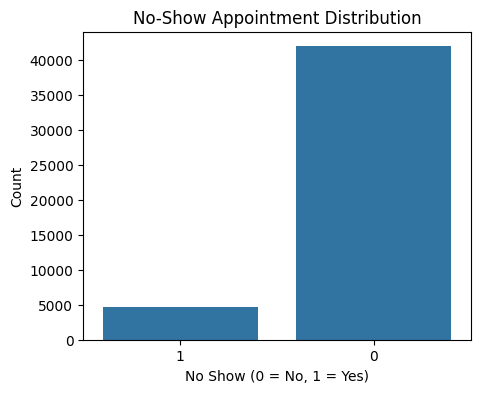

In [31]:
plt.figure(figsize=(5,4))
sns.countplot(x='no_show', data=df)
plt.title("No-Show Appointment Distribution")
plt.xlabel("No Show (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## Numerical values bar plot

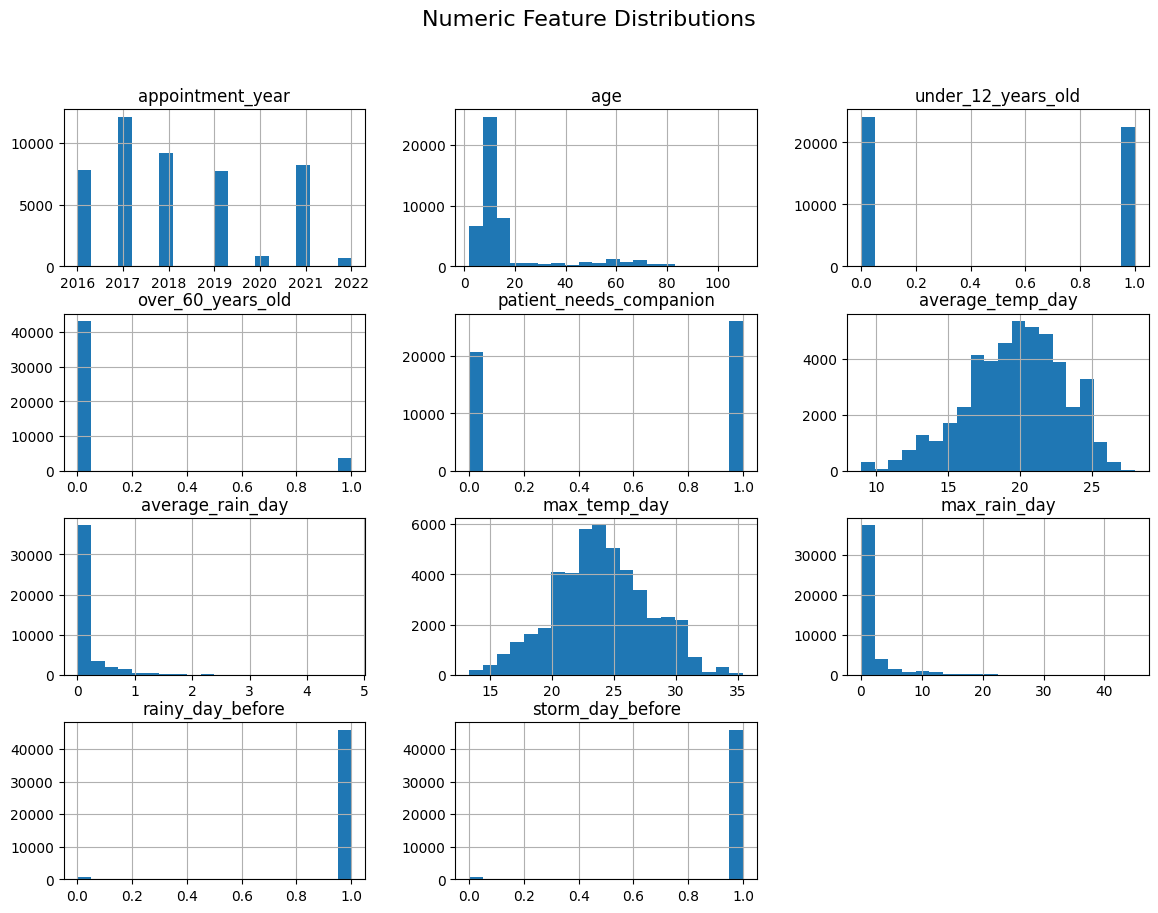

In [33]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

## Correlation heatmap

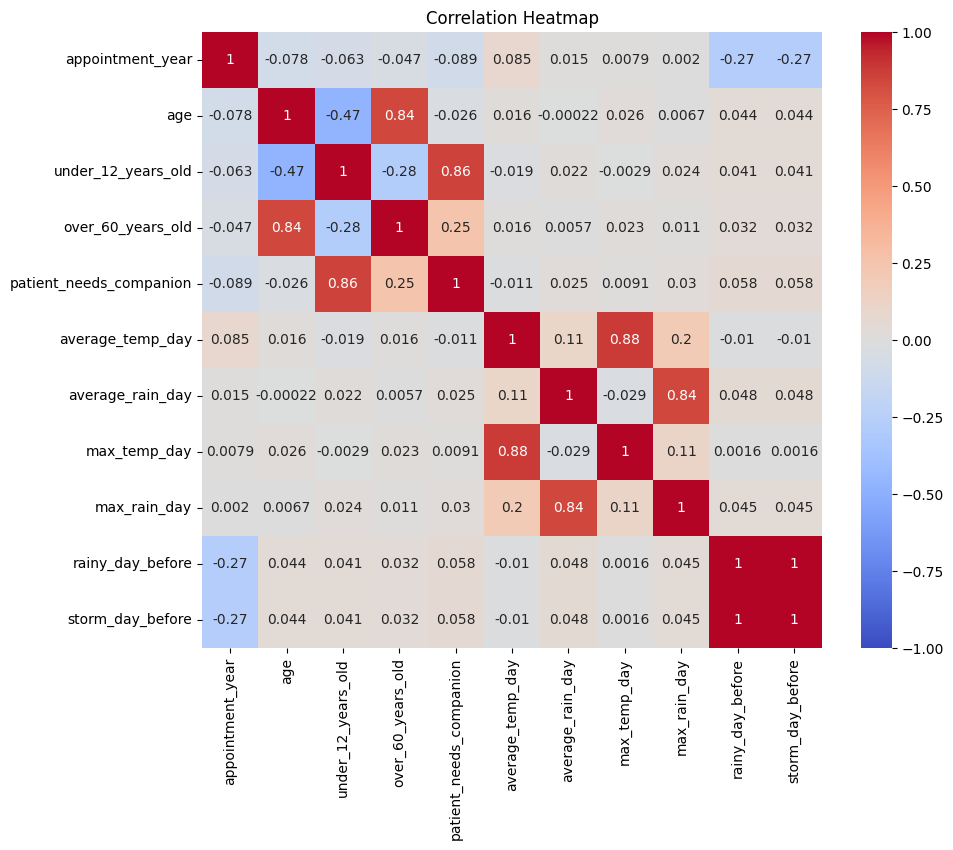

In [36]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm',vmin=-1)
plt.title("Correlation Heatmap")
plt.show()

## Categorical vs No show plots

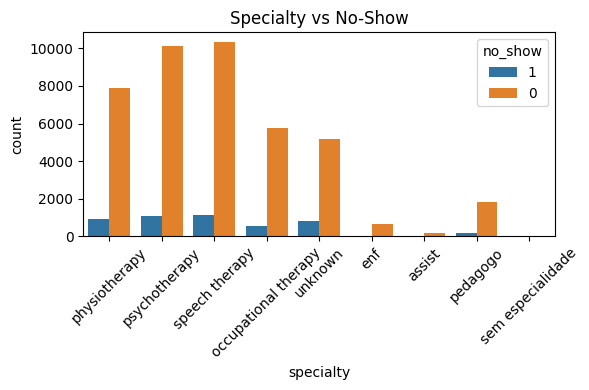

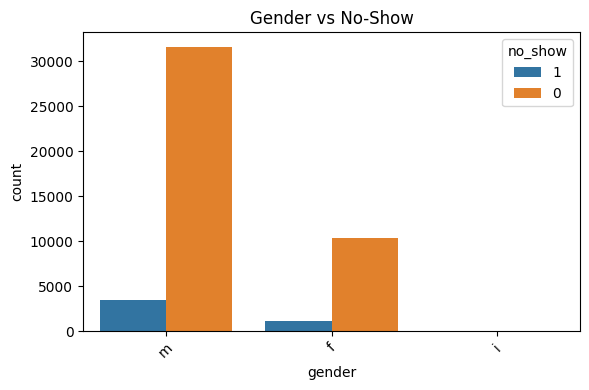

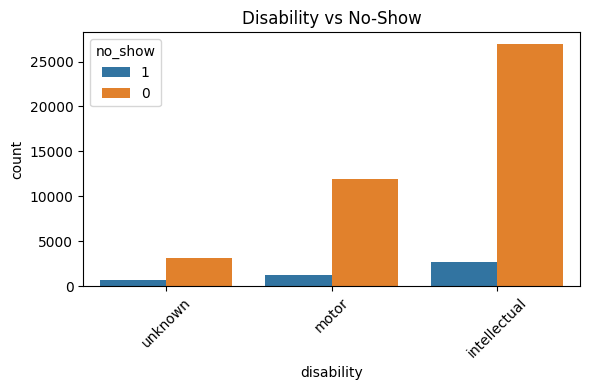

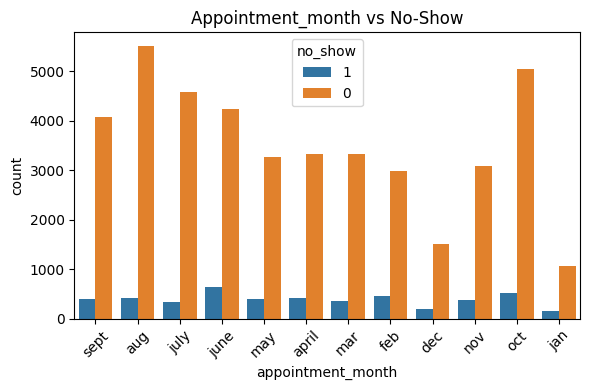

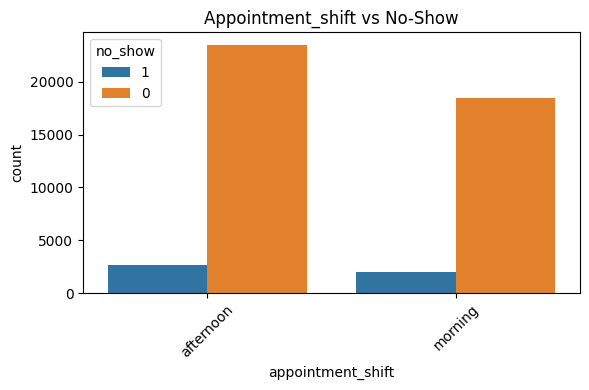

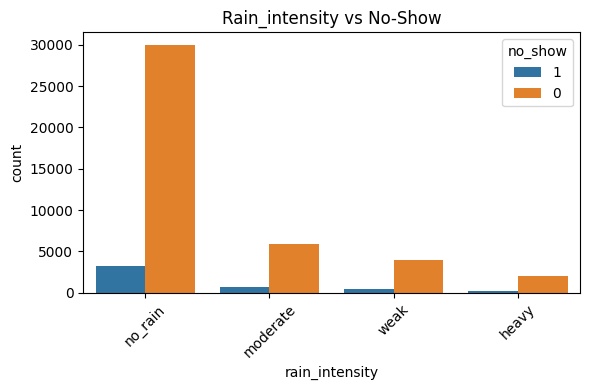

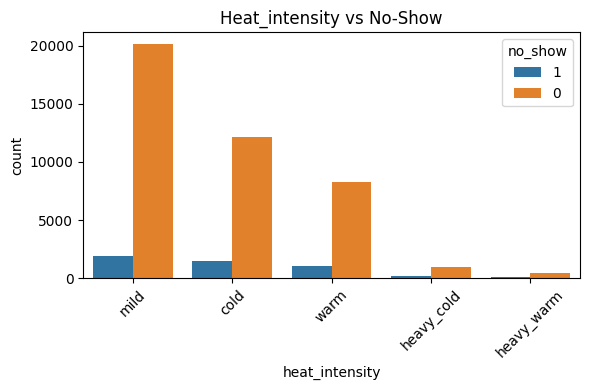

In [37]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    if col != 'no_show' and df[col].nunique() <= 12:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue='no_show')
        plt.title(f"{col.capitalize()} vs No-Show")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

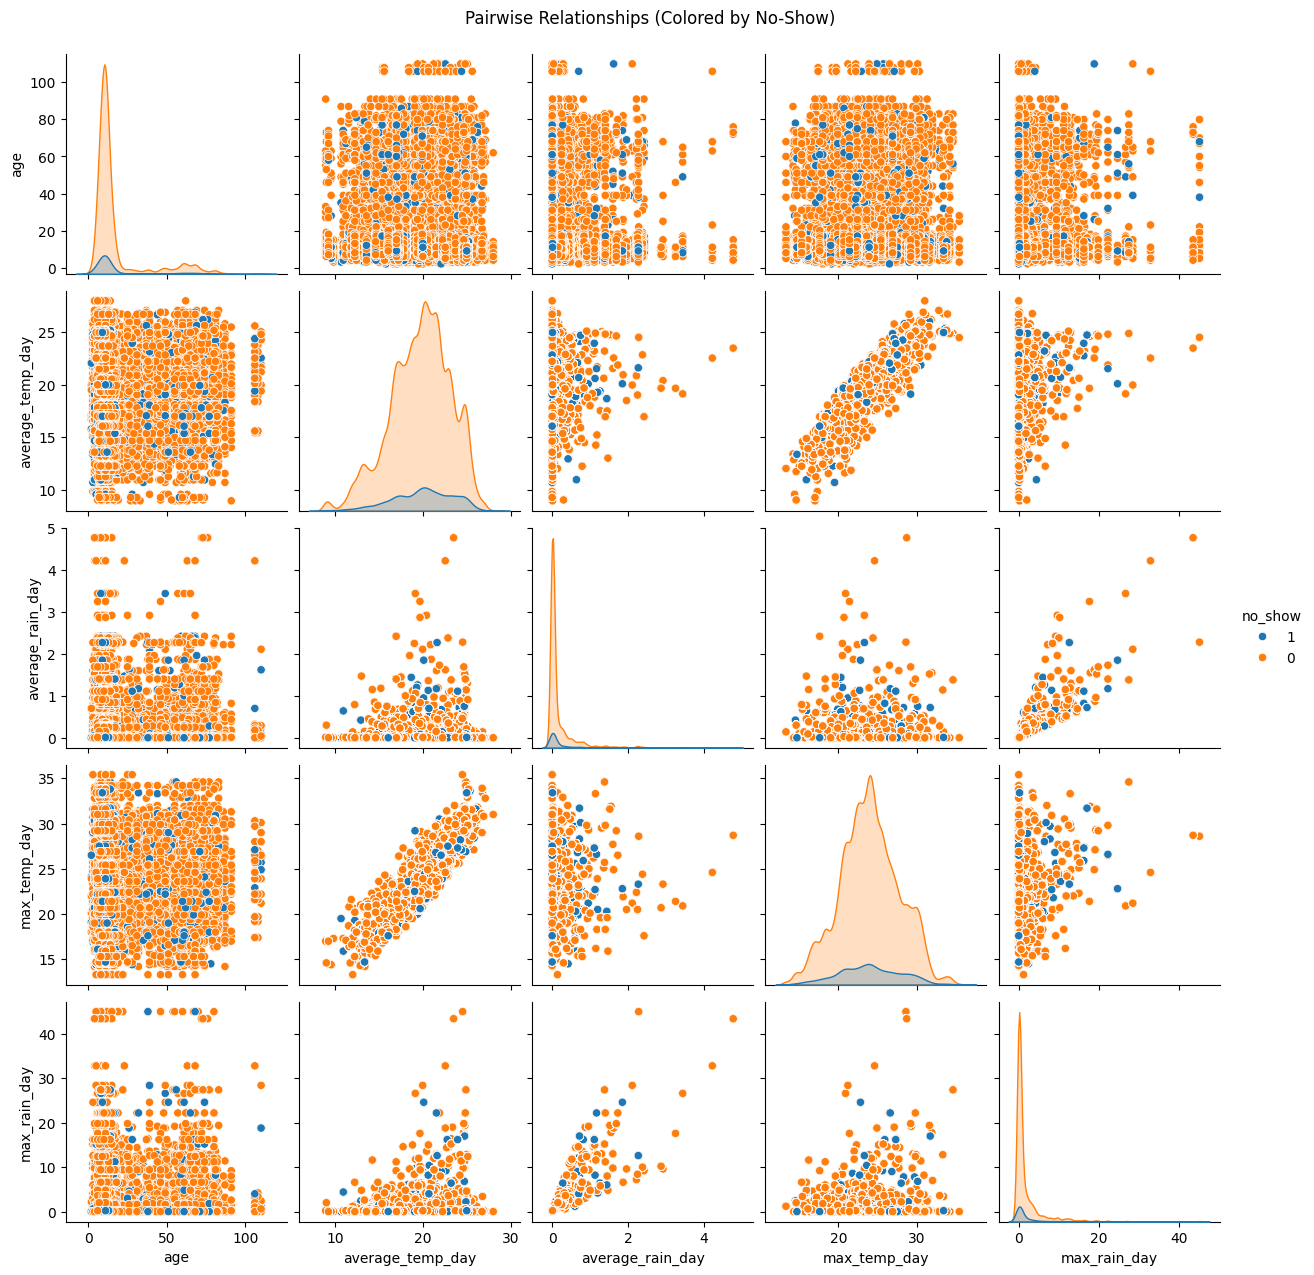

In [38]:
important_cols = [
    'age', 'average_temp_day', 'average_rain_day',
    'max_temp_day', 'max_rain_day', 'rain_intensity',
    'heat_intensity', 'no_show'
]
important_cols = [c for c in important_cols if c in df.columns]

if len(important_cols) > 2:
    sns.pairplot(df[important_cols], hue='no_show', diag_kind='kde')
    plt.suptitle("Pairwise Relationships (Colored by No-Show)", y=1.02)
    plt.show()

## Age plot

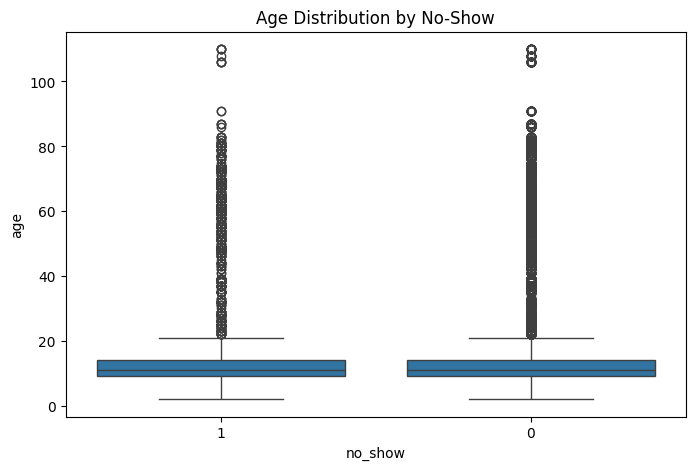

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='no_show', y='age', data=df)
plt.title("Age Distribution by No-Show")

plt.show()

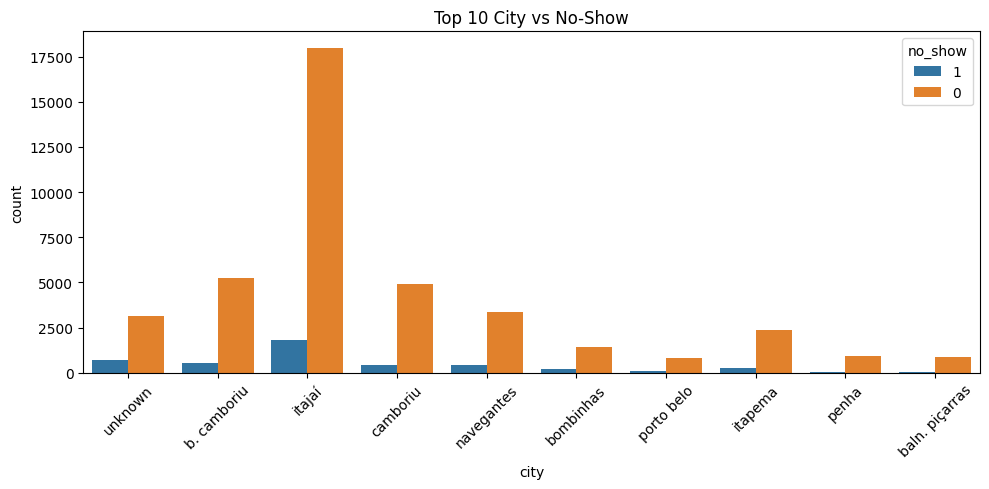

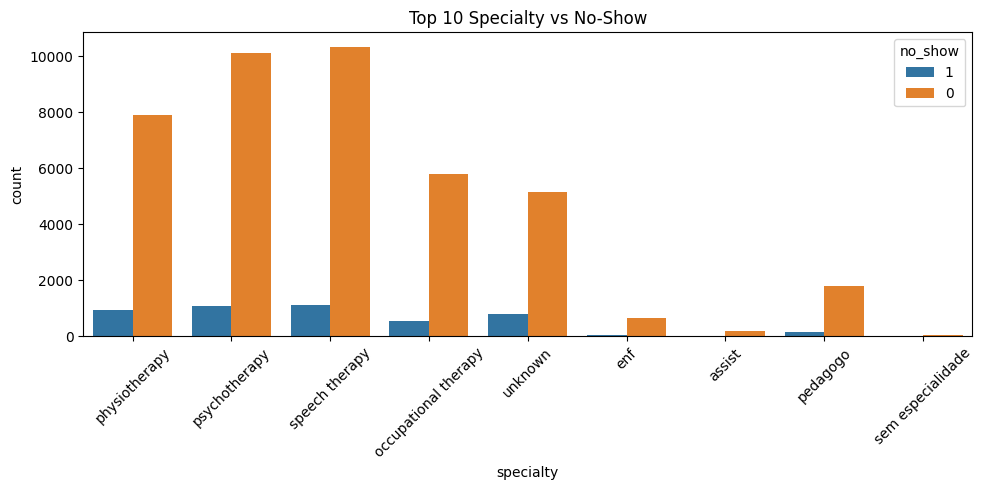

In [42]:
for col in ['city', 'specialty']:
    if col in df.columns:
        plt.figure(figsize=(10,5))
        top_values = df[col].value_counts().nlargest(10).index
        sns.countplot(data=df[df[col].isin(top_values)], x=col, hue='no_show')
        plt.title(f"Top 10 {col.capitalize()} vs No-Show")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Outliers

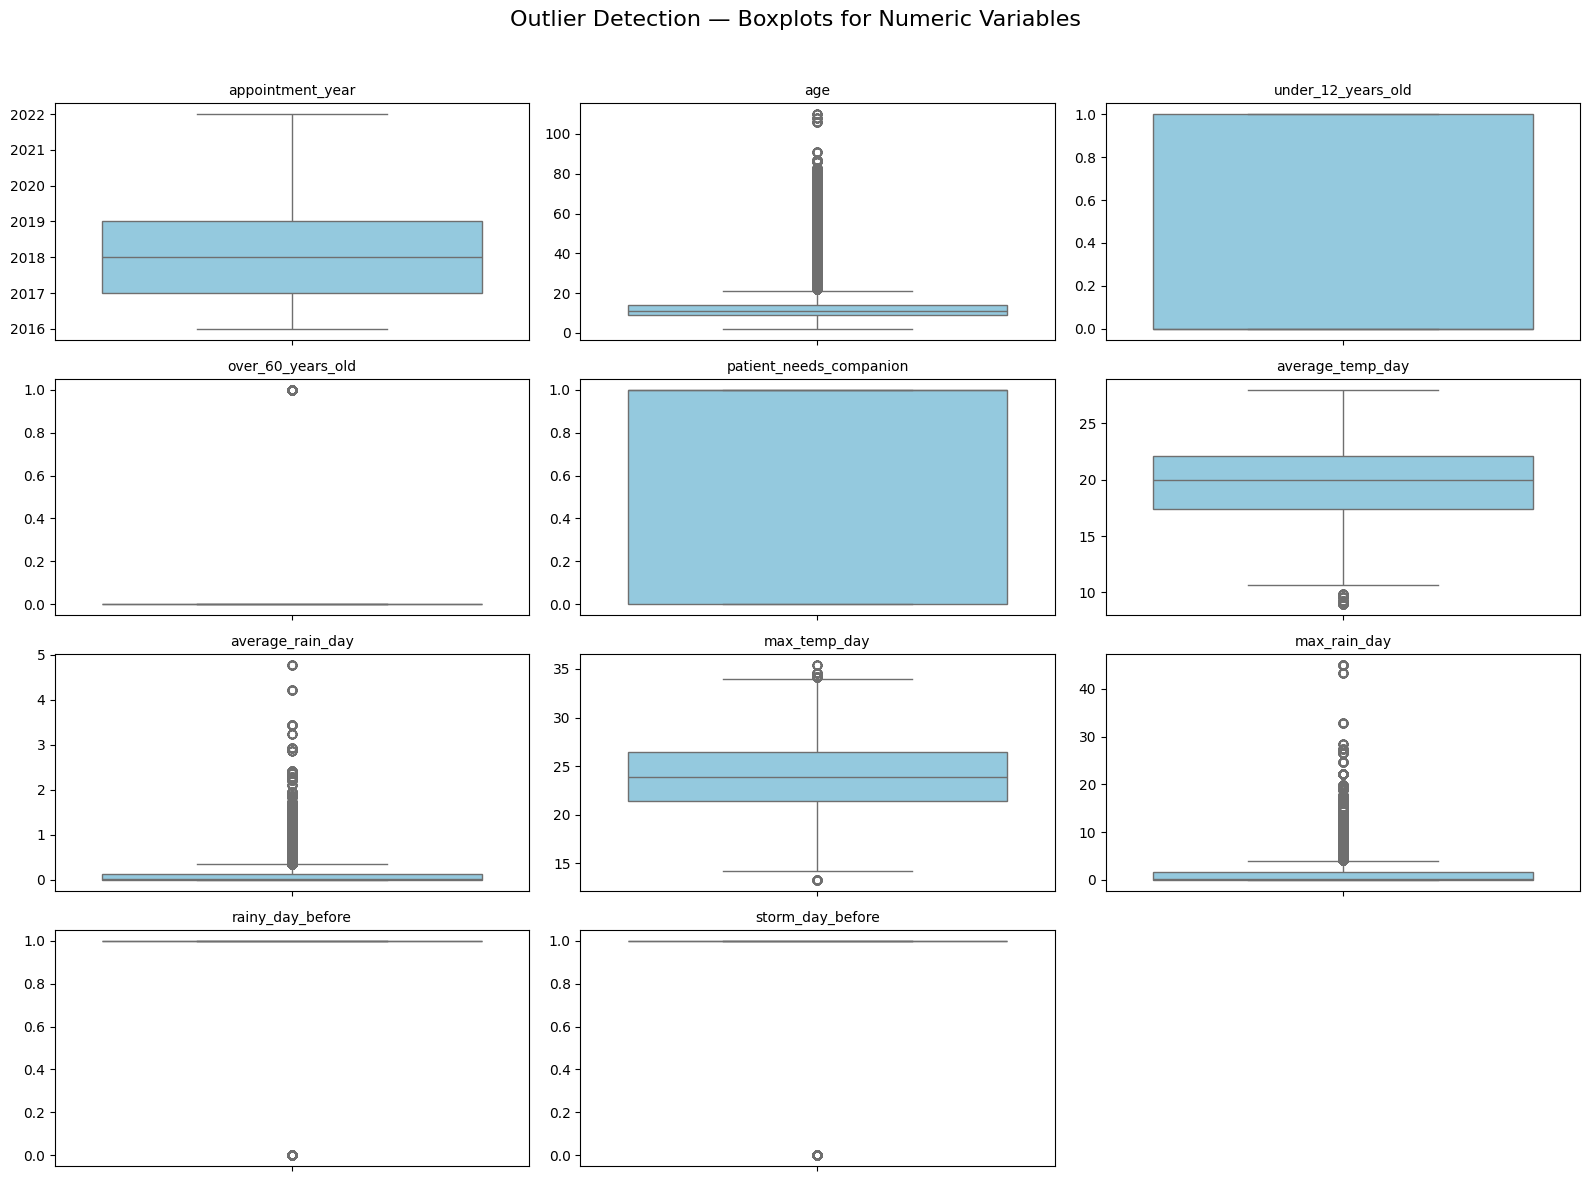

In [47]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(16, 12))
plt.suptitle("Outlier Detection — Boxplots for Numeric Variables", fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Model Building

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Data Preprocessing

In [51]:
target = 'no_show'
X = df.drop(columns=[target])
y = df[target].astype(int) 

In [53]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

In [54]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [55]:
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

## Train test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

## Model training

In [57]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [58]:
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9011247991430101

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      8399
           1       0.59      0.04      0.08       936

    accuracy                           0.90      9335
   macro avg       0.75      0.52      0.52      9335
weighted avg       0.87      0.90      0.86      9335

